# Machine Learning Used To Predict Oil & Gas Share Prices

In [32]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [33]:
# Read the csv file into a pandas DataFrame

data = pd.read_csv('Resources/P3_Data.csv')
data.head(312)

,Quarter,Year,Company_Name,Ticker,SharePrice_USD,Expenses_B_USD,Revenue_B_USD,CashFlow_B_USD,DividendYield_Percent,US_Unemployment_Percent,Brent_USD,LNG_USD,US_Interest_Percent
0,1,2005,Exxon,XOM,56,61.76,82.05,10.26,0.0027,0.053,48,9.89,0.0247
1,1,2005,BP,BP,62,47.08,55.51,6.52,0.0051,0.053,48,9.89,0.0247
2,1,2005,Equinor,EQNR,17,9.96,13.35,1.73,0.0000,0.053,48,9.89,0.0247
3,1,2005,Chevron,CVX,57,34.46,41.61,2.44,0.0040,0.053,48,9.89,0.0247
4,1,2005,Shell,RDS-A,63,62.36,72.16,5.16,0.0000,0.053,48,9.89,0.0247
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,4,2017,BP,BP,40,67.56,67.82,1.48,0.0060,0.042,61,3.84,0.0120
308,4,2017,Equinor,EQNR,20,11.93,17.11,1.71,0.0022,0.042,61,3.84,0.0120
309,4,2017,Chevron,CVX,118,35.96,36.38,2.59,0.0108,0.042,61,3.84,0.0120
310,4,2017,Shell,RDS-A,65,80.59,85.42,1.41,0.0094,0.042,61,3.84,0.0120


## Original Coefficient Matrix

Found that Revenue & Expenses were too highly related so below a new dataframe is created with all variable that are independent

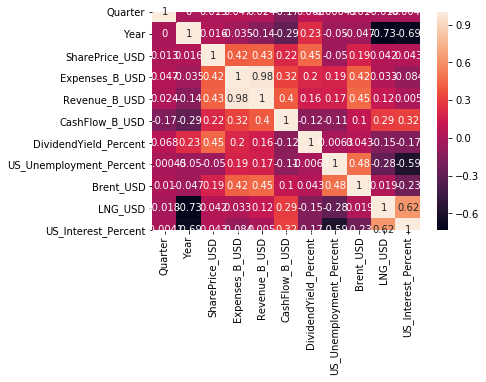

In [34]:
df = data.drop(data.columns[[0, 1, 2, 3, 5]], axis=1)
df

,SharePrice_USD,Revenue_B_USD,CashFlow_B_USD,DividendYield_Percent,US_Unemployment_Percent,Brent_USD,LNG_USD,US_Interest_Percent
0,56,82.05,10.26,0.0027,0.053,48,9.89,0.0247
1,62,55.51,6.52,0.0051,0.053,48,9.89,0.0247
2,17,13.35,1.73,0.0000,0.053,48,9.89,0.0247
3,57,41.61,2.44,0.0040,0.053,48,9.89,0.0247
4,63,72.16,5.16,0.0000,0.053,48,9.89,0.0247
...,...,...,...,...,...,...,...,...
307,40,67.82,1.48,0.0060,0.042,61,3.84,0.0120
308,20,17.11,1.71,0.0022,0.042,61,3.84,0.0120
309,118,36.38,2.59,0.0108,0.042,61,3.84,0.0120
310,65,85.42,1.41,0.0094,0.042,61,3.84,0.0120


## Run New Coefficient Matrix To Make Sure Variables Are Independent 
*Note: If variables are too highly related it causes Multicollinearity, that can ultimately reduce the importance of independent variables & weaken the linear regression*

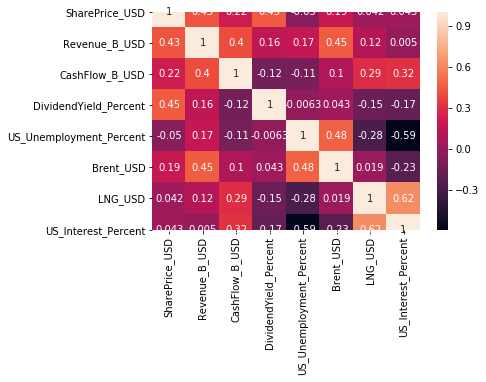

In [35]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = df.corr()

sn.heatmap(corrMatrix, annot=True)
plt.show()

In [36]:
# Reshape df variables to be properly read
import statsmodels.api as OLS

X = df[["Revenue_B_USD", "CashFlow_B_USD", "DividendYield_Percent", "US_Unemployment_Percent", "Brent_USD", "LNG_USD", "US_Interest_Percent"]]
y = df["SharePrice_USD"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (312, 7) (312, 1)


# Print Statistical Summary

The Statistical Summary below shows:
* Revenue, Cash Flow, Divident Yield, & Unemployment Percent at all above 90% confidence making them significant
* Brend Oil Price, LNG Price, & US Interest Rate are all under 90% confidence making them insignificant 
* R-Squared is low, showing that there is a high chance these variables do not have a strong affect on Share Price

In [40]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(y,X).fit()
results.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     24.70
Date:                Sat, 18 Jul 2020   Prob (F-statistic):           1.36e-26
Time:                        16:38:57   Log-Likelihood:                -1379.5
No. Observations:                 312   AIC:                             2775.
Df Residuals:                     304   BIC:                             2805.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      29.6457      6.574      4.510      0.000      16.710      42.582
Revenue_B_USD               0.2458      0.048      5.165      0.000       0.152       0.340
CashFlow_B_USD              0.8659      0.408      2.121      0.035       0.062       1.669
DividendYield_Percent    2795.6558    327.306      8.541      0.000    2151.584    3439.728
US_Unemployment_Percent  -138.4598     83.933     -1.650      0.100    -303.623      26.703
Brent_USD                   0.0854      0.057      1.501      0.134      -0.027       0.197
LNG_USD                    -0.2102      0.449     -0.468      0.640      -1.095       0.674
US_Interest_Percent        73.9367    100.513      0.736      0.463    -123.852     271.725
==============================================================================
Omnibus:                       20.630   Durbin-Watson:                   2.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.467
Skew:                           0.672   Prob(JB):                     8.02e-06
Kurtosis:                       2.969   Cond. No.                     2.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Residual Plot

Use A Residual Plot to Check If Linear Regression Is Applicable
* Because data points are randomly scattered around horizontal line, **linear is appropriate**
* Had it been a u-shape around the horizontal line, non-linear would have been appropriate

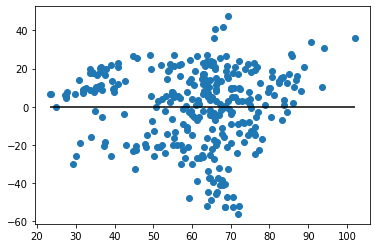

In [41]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

# Linear Regression Model 


**Notes**:
* Most favored model for purpose of this data as it shows the relationship of multiple independent variable on one dependent variable
* Weak R2 Score shows weak or low effect (.3625)

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.3625457174043082


In [43]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [45]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Test Training vs Testing Data On Residual Plot

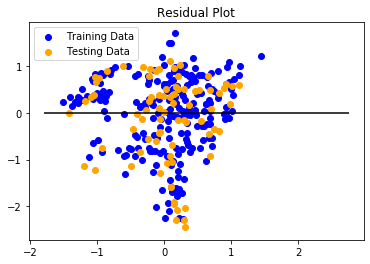

In [46]:
model.fit(X_train_scaled, y_train_scaled)

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

# Calculate Mean Squared Error Using Predicted Data

* MSE should be close to zero
* Ours is .82 means that there is a lot of variance or bias in the data
* We inferred that there is large variance in our data becuase we took out any highly related variable that would cause variance

In [47]:
# Use X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8278855670826071, R2: 0.29443125574021656


# Lasso Model

* MSE should be close to zero
* Ours is .82 means that there is a lot of variance or bias in the data
* We inferred that there is large variance in our data becuase we took out any highly related variable that would cause variance

In [48]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.829220704292338, R2: 0.2932933797801319


# Ridge Model

* MSE should be close to zero
* Ours is .82 means that there is a lot of variance or bias in the data
* We inferred that there is large variance in our data becuase we took out any highly related variable that would cause variance

In [49]:
# Ridge model
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8278845435114596, R2: 0.29443212808276964


# ElasticNet Model

* MSE should be close to zero
* Ours is .82 means that there is a lot of variance or bias in the data
* We inferred that there is large variance in our data becuase we took out any highly related variable that would cause variance

In [50]:
# ElasticNet model
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8282481239450271, R2: 0.29412226522230966


# Decision Tree Model

* Score should be close to 1 for 100% accuracy 
* The score .038 that means there is only 3.8% accuracy
* Decision Tree is not the best model for the data set, it is better for non-linear data

In [51]:
# test the decision tree model

from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.07692307692307693

# Random Forest Model

* Score should be close to 1 for 100% accuracy 
* The score .0897 that means there is only 9% accuracy
* More accurate than Decision Tree because it is making multiple decision, learning more 
* Better for non-linear data 
* From finding feature importance, can see that Revenue, Cash Flow, Dividend Yield aree still the most important 
* New finding that the model found LNG to be more signifianct and for US Unemployment Percentage to be insignificant 

In [52]:
# test the decision random forest classifier model

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.0641025641025641

In [53]:
# find the most important variables as found in the random forest
feature_names = df.columns

sorted(zip(rf.feature_importances_, feature_names), reverse=True) 

[(0.2112505399387572, 'Revenue_B_USD'),
 (0.18880247150436957, 'CashFlow_B_USD'),
 (0.1576175483737382, 'DividendYield_Percent'),
 (0.12080500553989988, 'LNG_USD'),
 (0.1133027750472492, 'Brent_USD'),
 (0.10541455635687204, 'US_Unemployment_Percent'),
 (0.10280710323911388, 'US_Interest_Percent'),
 (0.0, 'SharePrice_USD')]

In [54]:
#load the data
data = pd.read_csv('Resources/P3_Data_Univariate.csv')

# Forecast Last Few Quarters of Share Prices
### Use Auto Arima to split univariable data of just Quarter & Share Price to predict future Share Price

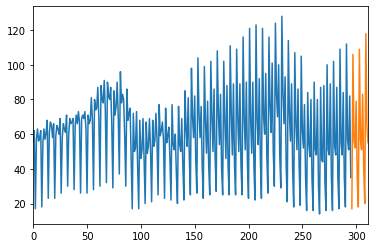

In [55]:
#divide into train and validation set
train = data[:int(0.95*(len(data)))]
valid = data[int(0.95*(len(data))):]

#preprocessing (since arima takes univariate series as input)
train.drop('Date',axis=1,inplace=True)
valid.drop('Date',axis=1,inplace=True)

#plotting the data
train['SharePrice_USD'].plot()
valid['SharePrice_USD'].plot()

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=2442.845, BIC=2464.988, Time=0.302 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=2746.692, BIC=2754.073, Time=0.007 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=2737.448, BIC=2748.519, Time=0.015 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=2728.863, BIC=2739.934, Time=0.048 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=3320.771, BIC=3324.461, Time=0.005 seconds
Fit ARIMA(1,0,2)x(0,0,0,0) [intercept=True]; AIC=2704.355, BIC=2722.807, Time=0.209 seconds
Fit ARIMA(2,0,1)x(0,0,0,0) [intercept=True]; AIC=2660.795, BIC=2679.247, Time=0.250 seconds
Fit ARIMA(3,0,2)x(0,0,0,0) [intercept=True]; AIC=2438.925, BIC=2464.758, Time=0.339 seconds
Fit ARIMA(3,0,1)x(0,0,0,0) [intercept=True]; AIC=2633.292, BIC=2655.434, Time=0.240 seconds
Fit ARIMA(4,0,2)x(0,0,0,0) [intercept=True]; AIC=2536.917, BIC=2566.440, Time=0.374 seconds
Fit ARIMA(3,0,3)x(0,0,0,0) [intercep

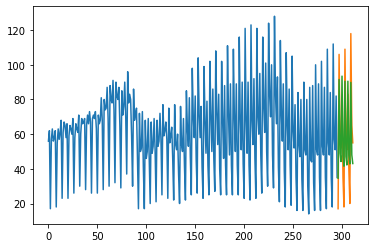

In [56]:
#building the model
from pmdarima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [57]:
# Load in predicted vs actual data to plot

predicted_df = pd.read_csv('Resources/valid_predicted.csv')

# Use Predicted Outputs to Plot Difference Between Predicted & Actual
* Each company is plotted as single data point in respective quarter 
* Half of 2017 Q2 data, all 2017 Q3 data, & all 2017 Q4 data

In [58]:
import plotly.graph_objects as go

SharePrice_USD = predicted_df.SharePrice_USD
Prediction = predicted_df.Prediction

fig = go.Figure()
fig.add_trace(go.Scatter(x=predicted_df.index, y=SharePrice_USD,
                    mode='lines',
                    name='Actual Share Price'))
fig.add_trace(go.Scatter(x=predicted_df.index, y=Prediction,
                    mode='lines',
                    name='Predicted Share Price'))
fig.update_layout(title='Actual vs Predicted Share Prices For 2.5 Quarters',
                   xaxis_title='Q2 2017 - Q4 2017 Inidivual Quarters',
                   yaxis_title='Share Price')
fig.show()

# Plots

In [59]:
all_data=pd.read_csv("Resources/P3_Data_Date.csv")  
all_data["Date"]=all_data["Date"].astype('datetime64[ns]')
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
all_data["SharePrice_USD"]=scaler.fit_transform(all_data["SharePrice_USD"].to_frame())

In [60]:
all_data

,Date,Quarter,Year,Company_Name,Ticker,SharePrice_USD,Expenses_B_USD,Revenue_B_USD,CashFlow_B_USD,DividendYield_Percent,US_Unemployment_Percent,Brent_USD,LNG_USD,US_Interest_Percent
0,2005-01-01,1,2005,Exxon,XOM,0.368421,61.76,82.05,10.26,0.0027,0.053,48,9.89,0.0247
1,2005-01-01,1,2005,BP,BP,0.421053,47.08,55.51,6.52,0.0051,0.053,48,9.89,0.0247
2,2005-01-01,1,2005,Equinor,EQNR,0.026316,9.96,13.35,1.73,0.0000,0.053,48,9.89,0.0247
3,2005-01-01,1,2005,Chevron,CVX,0.377193,34.46,41.61,2.44,0.0040,0.053,48,9.89,0.0247
4,2005-01-01,1,2005,Shell,RDS-A,0.429825,62.36,72.16,5.16,0.0000,0.053,48,9.89,0.0247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2017-10-01,4,2017,BP,BP,0.228070,67.56,67.82,1.48,0.0060,0.042,61,3.84,0.0120
308,2017-10-01,4,2017,Equinor,EQNR,0.052632,11.93,17.11,1.71,0.0022,0.042,61,3.84,0.0120
309,2017-10-01,4,2017,Chevron,CVX,0.912281,35.96,36.38,2.59,0.0108,0.042,61,3.84,0.0120
310,2017-10-01,4,2017,Shell,RDS-A,0.447368,80.59,85.42,1.41,0.0094,0.042,61,3.84,0.0120


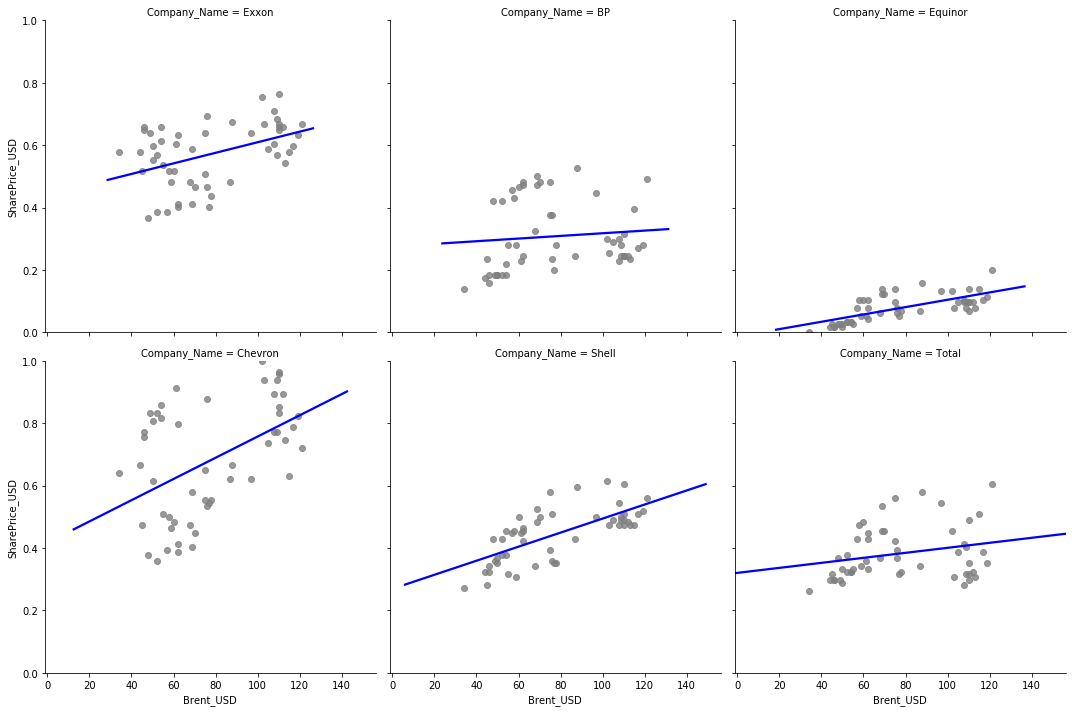

In [61]:
sns.lmplot(x="Brent_USD", y="SharePrice_USD", col="Company_Name",ci=None, col_wrap=3, 
           data=all_data, order=1,line_kws={'color': 'blue'},scatter_kws={'color': 'grey'}).set(ylim=(0, 1))

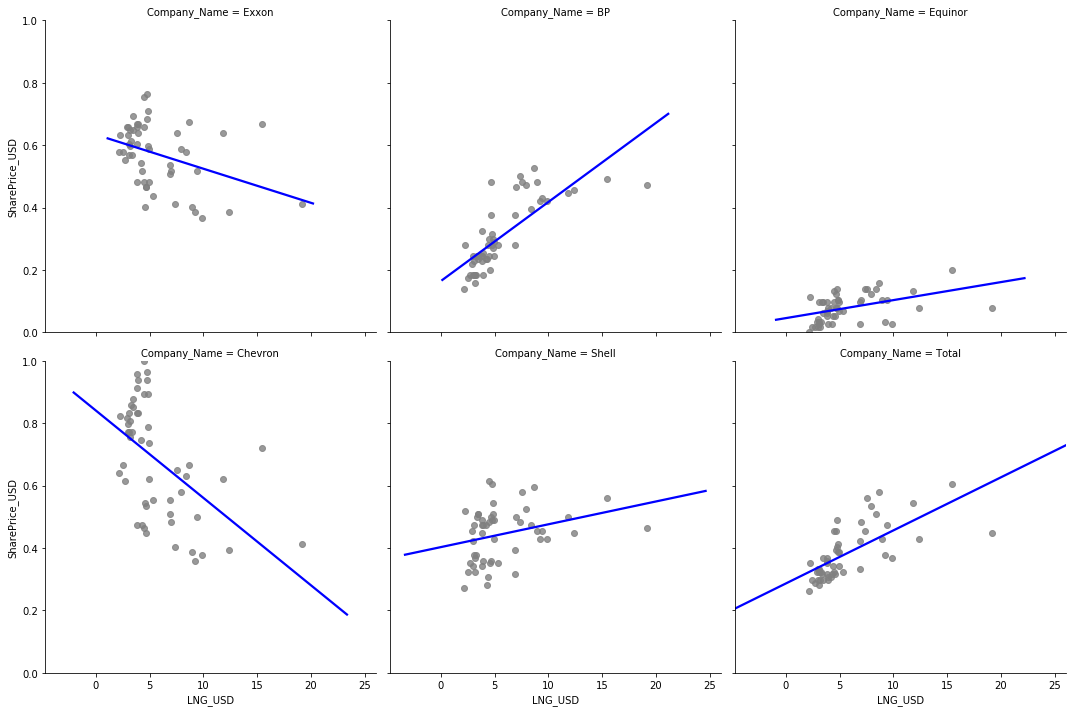

In [62]:
sns.lmplot(x="LNG_USD", y="SharePrice_USD", col="Company_Name",ci=None, col_wrap=3, 
           data=all_data, order=1,line_kws={'color': 'blue'},scatter_kws={'color': 'grey'}).set(ylim=(0, 1))